In [126]:
import numpy as np
import math 
import matplotlib.pyplot as plt 
import pickle

In [127]:
poolv = pickle.load(open("/home/lab1/repo/planning/saved_gibbs/8kfb_veh_pool.pickle",'rb'))

In [128]:
poolv

{2: array([[[  629.74658203, -2250.74169922],
         [  626.14746094, -2256.24243164],
         [  623.23803711, -2260.68237305],
         ...,
         [  589.33453369, -2320.19042969],
         [  587.24108887, -2324.35693359],
         [  585.06555176, -2328.69677734]],
 
        [[  582.79241943, -2333.0480957 ],
         [  580.39691162, -2337.41308594],
         [  577.96166992, -2341.65136719],
         ...,
         [  541.02270508, -2379.08691406],
         [  539.57574463, -2380.02075195],
         [  538.40289307, -2380.77563477]],
 
        [[  546.06811523, -2412.45117188],
         [  545.78515625, -2411.83129883],
         [  545.81494141, -2411.8605957 ],
         ...,
         [  541.03741455, -2401.99145508],
         [  541.01953125, -2401.93286133],
         [  541.12359619, -2402.11547852]],
 
        ...,
 
        [[  540.72607422, -2400.99902344],
         [  540.62365723, -2400.78149414],
         [  540.45123291, -2400.3190918 ],
         ...,
         [  53

In [129]:
def _get_av(prev2, prev, curr):
    v10 = np.linalg.norm(curr - prev)/0.5
    v9 = np.linalg.norm(prev - prev2)/0.5
    a = (v10-v9)/0.5
    return a, v10

# def _get_theta(prev,curr):
#     try:
#         diff = curr[0]-prev[0] 
#         if diff !=0:
#             tan = (curr[1]-prev[1])/diff
#             return math.atan(tan)
#         else:
#             return 90
#     except:
#         return 90
    
def _get_theta(prev,curr):
    diff_x = curr[0]-prev[0] 
    diff_y = curr[1]-prev[1]
    indicator=1
    if diff_x<=0 and diff_y>=0:
        indicator=2
    elif diff_x<=0 and diff_y<=0:
        indicator=3
    else:
        indicator=4
    try:
        if diff_x !=0:
            tan = diff_y/diff_x
#             print("tan", tan, math.atan(tan)*180/math.pi)
            return math.atan(tan)*180/math.pi, indicator
        else:
            return 90, indicator
    except:
        return 90, indicator

In [130]:
for key in poolv.keys():
    trajset = poolv[key]
    print(trajset.shape)

(1104, 20, 2)
(3098, 20, 2)
(3190, 20, 2)


In [131]:
delta_a, delta_theta=[],[]
for key in poolv.keys():
    trajset = poolv[key]
    for traj in trajset:
        prev_a=None
        prev_theta=None
        for i in range(2, len(traj)):
            prev2 = traj[i-2]
            prev = traj[i-1]
            curr = traj[i]
            a, v = _get_av(prev2, prev, curr)
            if prev_a is None:
                prev_a = a
            else:
                da = a-prev_a
                delta_a.append(da)
            theta,_ = _get_theta(prev, curr)
            if prev_theta is None:
                prev_theta = theta
            else:
                dtheta = theta-prev_theta
                delta_theta.append(dtheta)
            

In [132]:
print(len(delta_a), len(delta_theta))

125664 125664


In [133]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.9999):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

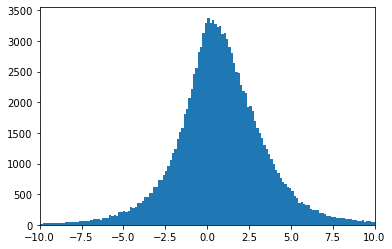

In [134]:
# xx = np.arange(-3,3,0.1)
plt.hist(delta_a, bins=1000)
plt.xlim(-10,10)
plt.show()

In [135]:
a,b,c = mean_confidence_interval(delta_a, 0.999999999)
print(a, b,c)

0.8123104408688374 0.7568494735514654 0.8677714081862095


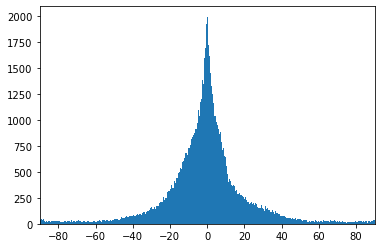

In [140]:
plt.hist(delta_theta, bins=1000)
plt.xlim(-90,90)
plt.show()

In [142]:
a,b,c = mean_confidence_interval(delta_theta, 0.999999999)
print(a, b,c)

0.8949461928851749 0.10770025488779666 1.682192130882553


In [39]:
import itertools
action_dict = list(itertools.product(np.round(np.arange(-3,3,0.1), decimals=1), np.round(np.arange(-2,2,0.5), decimals=1)))
print(len(action_dict))

480


## reload

In [143]:

tasks = pickle.load(open("/home/lab1/repo/planning/tasks/task.pickle",'rb'))
print(tasks[0].shape)

(20, 2)


In [144]:
def _get_av(prev2, prev, curr):
    v10 = np.linalg.norm(curr - prev)/0.5
    v9 = np.linalg.norm(prev - prev2)/0.5
    a = (v10-v9)/0.5
    return a, (v10+v9)/2

def _get_theta(prev,curr):
    diff_x = curr[0]-prev[0] 
    diff_y = curr[1]-prev[1]
    indicator=1
    if diff_x<=0 and diff_y>=0:
        indicator=2
    elif diff_x<=0 and diff_y<=0:
        indicator=3
    else:
        indicator=4
    try:
        if diff_x !=0:
            tan = diff_y/diff_x
            print("tan", tan, math.atan(tan)*180/math.pi)
            return math.atan(tan)*180/math.pi, indicator
        else:
            return 90, indicator
    except:
        return 90, indicator

In [146]:
def get_guide(traj):
    guide=[]
    for i in range(9,19):
        a,_ = _get_av(traj[i-1], traj[i], traj[i+1])
        theta, indicator = _get_theta(traj[i], traj[i+1])
        guide.append([a, theta, indicator])
    return guide
guide = get_guide(tasks[0])
print(len(guide),guide)

tan 0.8671141617038458 40.929021868007084
tan 0.8306801043736385 39.71573791967779
tan 0.7119846148715497 35.45028110637137
tan 0.6576295664161224 33.33010242890589
tan 0.6056905397956155 31.202892951948336
tan 0.5163429943336147 27.309251743558217
tan 0.47710653395092145 25.506114380621007
tan 0.4307463795024137 23.30378617530467
tan 0.32764438644586086 18.141092493312904
tan 0.28263420287634033 15.782106666569984
10 [[0.034677749016960746, 40.929021868007084, 3], [0.9053716228351476, 39.71573791967779, 3], [0.4437373803422382, 35.45028110637137, 3], [-0.25243820554160834, 33.33010242890589, 3], [0.2177503561583407, 31.202892951948336, 3], [0.08378682734997156, 27.309251743558217, 3], [0.4389231150954771, 25.506114380621007, 3], [-0.2449449895566893, 23.30378617530467, 3], [-0.8223339236409899, 18.141092493312904, 3], [0.10686495956812792, 15.782106666569984, 3]]


In [147]:
print(math.atan(1) *180/math.pi)
print([1,2.0,3]+ [2.1,1]+[1.0])


45.0
[1, 2.0, 3, 2.1, 1, 1.0]


0.034677749016960746 12.796792439167263
tan 0.8671141617038458 40.929021868007084
dist 6.402730938210752 0.034677749016960746
rad 40.929021868007084 0.7143461912174837
dxdy 4.83740234375 4.194580078125002
tan 0.8671141617038458 40.929021868007084
new theta  (40.929021868007084, 3) gt 40.929021868007084
dist to gt 0.0
dist to prev 6.402730938210751
gt 6.402730938210751


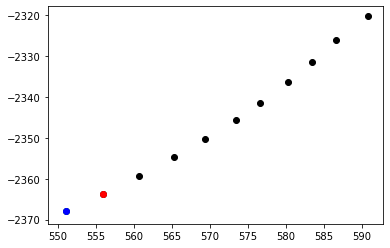

dist 6.520237109692265 0.9053716228351476
rad 39.71573791967779 0.6931703915575407
dxdy 5.015523328369862 4.166295441898695
tan 0.8306801043736735 39.71573791967897
new theta  (39.71573791967897, 3) gt 39.71573791967779
dist to gt 0.10883673422709951
dist to prev 6.520237109692438
gt 6.629073843919538


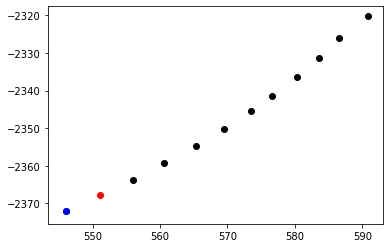

dist 6.688875735089438 0.4437373803422382
rad 35.45028110637137 0.6187241260637186
dxdy 5.44888607608512 3.8795230543604147
tan 0.7119846148715716 35.4502811063722
new theta  (35.4502811063722, 3) gt 35.45028110637137
dist to gt 0.15987280037895368
dist to prev 6.580345440752029
gt 6.740008189005097


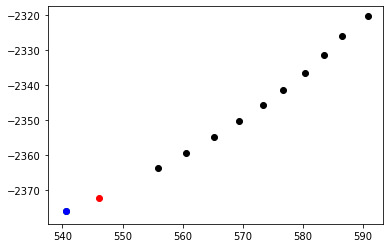

dist 6.712788131939517 -0.25243820554160834
rad 33.33010242890589 0.581720027411367
dxdy 5.608660663519972 3.6884210803257993
tan 0.657629566416143 33.33010242890672
new theta  (33.33010242890672, 3) gt 33.33010242890589
dist to gt 0.1241608724148159
dist to prev 6.553544135110999
gt 6.676898637619695


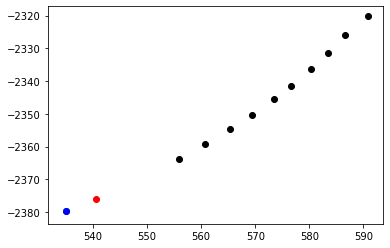

dist 6.708452150766608 0.2177503561583407
rad 31.202892951948336 0.5445932181588312
dxdy 5.737994737309983 3.4754491297856847
tan 0.6056905397956356 31.20289295194917
new theta  (31.20289295194917, 3) gt 31.202892951948336
dist to gt 0.14682753853468636
dist to prev 6.585713413949471
gt 6.73133622665928


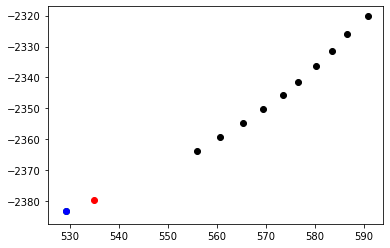

dist 6.746144298705147 0.08378682734997156
rad 27.309251743558217 0.476636359181093
dxdy 5.99424038225448 3.0950840277287495
tan 0.5163429943336098 27.30925174355799
new theta  (27.30925174355799, 3) gt 27.309251743558217
dist to gt 0.15285475160522302
dist to prev 6.602153363399031
gt 6.752282933496773


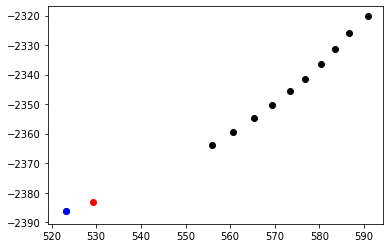

dist 6.8114830415108285 0.4389231150954771
rad 25.506114380621007 0.4451656753321107
dxdy 6.147631386614071 2.9330751028753363
tan 0.4771065339508882 25.506114380619454
new theta  (25.506114380619454, 3) gt 25.506114380621007
dist to gt 0.20248093615794888
dist to prev 6.66234309236741
gt 6.862013712270643


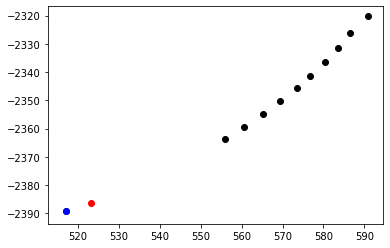

dist 6.8357303072031765 -0.2449449895566893
rad 23.30378617530467 0.406727796939803
dxdy 6.278073077563451 2.7042572484120324
tan 0.43074637950240313 23.303786175304165
new theta  (23.303786175304165, 3) gt 23.30378617530467
dist to gt 0.16839139924438265
dist to prev 6.637523089292616
gt 6.80077746488147


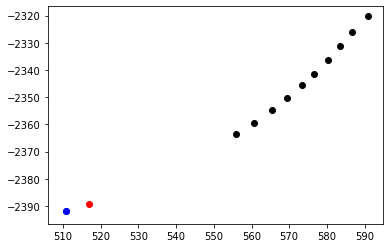

dist 6.702320443053467 -0.8223339236409899
rad 18.141092493312904 0.3166217939171376
dxdy 6.369165990810578 2.0868214832309753
tan 0.32764438644582955 18.141092493311284
new theta  (18.141092493311284, 3) gt 18.141092493312904
dist to gt 0.07586394923781609
dist to prev 6.543506676577353
gt 6.595193983971223


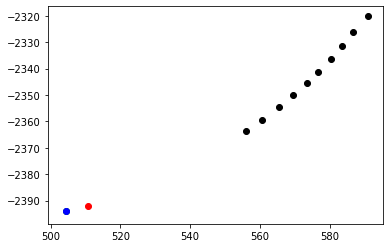

dist 6.612886822544359 0.10686495956812792
rad 15.782106666569984 0.2754497242325931
dxdy 6.363600689576372 1.7985712083217475
tan 0.282634202876357 15.782106666570868
new theta  (15.782106666570868, 3) gt 15.782106666569984
dist to gt 0.08204808899312967
dist to prev 6.563537461927175
gt 6.621910223863255


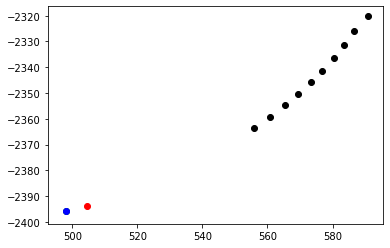

In [115]:
# distance = self.target.v*0.5+0.5*self.target.a*0.25
# 		radian = self.target.theta*math.pi/180
# 		dx, dy = distance*math.cos(radian), distance*math.sin(radian)
		
# 		#update state
# 		self.target.pos =[self.target.pos[0]+dx, self.target.pos[1]+dy]
# 		self.target.v = self.target.v+self.target.a*0.5
import matplotlib.pyplot as plt  
route = tasks[0]
a, v = _get_av(route[8],route[9] ,route[10])
print(a, v)
theta = _get_theta(route[9], route[10])
pos = route[9]
res = []
for i, ele in enumerate(guide):

    distance = v*0.5 + 0.5 * ele[0]* 0.25
    print("dist",distance, ele[0])
    radian = ele[1]*math.pi/180
    print("rad", ele[1], radian)
    dx, dy = distance*math.cos(radian), distance*math.sin(radian)
    print("dxdy", dx, dy)
    if ele[2]==1: # zone 1
        new_pos =[pos[0]+dx, pos[1]+dy]
    elif ele[2]==2:
        new_pos =[pos[0]-dx, pos[1]+dy]
    elif ele[2]==3:
        new_pos =[pos[0]-dx, pos[1]-dy]
    else:
        new_pos =[pos[0]+dx, pos[1]-dy]
    print("new theta ", _get_theta(pos, new_pos), 'gt',ele[1])
    pos=new_pos
#     ta,_ =  _get_av(route[-2], route[-1], new_pos)
#     print(ta)
    
    
    print("dist to gt",np.linalg.norm(new_pos - route[i+10]))
    
    print("dist to prev",np.linalg.norm(new_pos - route[i+9]))
    print("gt",np.linalg.norm(route[i+10] - route[i+9]))
    plt.scatter(np.array(route[:10])[:,0], np.array(route[:10])[:,1], c='k')
    plt.scatter(route[i+10][0], route[i+10][1], c='g')
    plt.scatter(route[i+9][0], route[i+9][1], c='r')
    plt.scatter(new_pos[0], new_pos[1], c='blue')
    plt.show()
#     break
    v = v + ele[0]*0.5
    res.append(pos)
    

In [25]:
print(tasks[0].shape)
print(tasks[0][11] - tasks[0][10])

(20, 2)
[-5.09924316 -4.23583984]


In [116]:
print(np.linalg.norm(tasks[0][11] - tasks[0][10]))
print(res)
print(tasks[0][10:])
print(np.linalg.norm(res[-1] - tasks[0][-1]))

6.629073843919538
[[551.1021118164062, -2367.8818359375], [546.0865884880363, -2372.048131379399], [540.6377024119512, -2375.9276544337595], [535.0290417484312, -2379.6160755140854], [529.2910470111211, -2383.0915246438713], [523.2968066288666, -2386.1866086716], [517.1491752422526, -2389.119683774475], [510.8711021646891, -2391.823941022887], [504.5019361738785, -2393.910762506118], [498.13833548430216, -2395.7093337144397]]
[[  551.10211182 -2367.88183594]
 [  546.00286865 -2372.11767578]
 [  540.5123291  -2376.02685547]
 [  534.93365479 -2379.69555664]
 [  529.17608643 -2383.18286133]
 [  523.1763916  -2386.28076172]
 [  516.9831543  -2389.2355957 ]
 [  510.73718262 -2391.92602539]
 [  504.46981812 -2393.97949219]
 [  498.09753418 -2395.78051758]]
0.08204808899312967
